In [11]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt 

In [13]:
"""Close, High, Low, Open, Volume"""
enddate = dt.datetime.now()
startdate = enddate - dt.timedelta(days = 365*5)
enddate, startdate
stocks = ['AVGO', 'NVDA', 'AMD']
df = yf.download(stocks, start = startdate, end = enddate)
df.head() 


[*********************100%***********************]  3 of 3 completed


Price           Close                             High                        \
Ticker            AMD       AVGO       NVDA        AMD       AVGO       NVDA   
Date                                                                           
2021-01-14  90.790001  40.668556  13.163231  92.360001  41.247002  13.561610   
2021-01-15  88.209999  40.108997  12.823440  91.589996  40.482335  13.287883   
2021-01-19  89.449997  41.316265  12.988724  89.580002  41.336059  13.057280   
2021-01-20  88.750000  41.551075  13.328269  90.779999  41.902821  13.392837   
2021-01-21  91.529999  41.995476  13.828610  92.070000  42.233871  13.959991   

Price             Low                             Open                        \
Ticker            AMD       AVGO       NVDA        AMD       AVGO       NVDA   
Date                                                                           
2021-01-14  90.449997  40.601984  13.143537  91.769997  40.798101  13.536930   
2021-01-15  87.860001  39.642104  12.812471  90.750000  40.318607  13.190906   
2021-01-19  87.239998  40.327598  12.807981  89.559998  40.327598  12.979748   
2021-01-20  88.599998  40.932145  13.020136  90.550003  41.338768  13.074981   
2021-01-21  88.430000  41.417929  13.215834  89.339996  41.571760  13.380869   

Price         Volume                       
Ticker           AMD      AVGO       NVDA  
Date                                       
2021-01-14  53408200  19692000  283120000  
2021-01-15  49340300  18165000  277780000  
2021-01-19  45115100  18819000  226188000  
2021-01-20  35185800  14710000  258572000  
2021-01-21  54221900  15749000  337780000

In [14]:
"""Adjusted Close"""
df = yf.download(stocks, start=startdate, end=enddate, auto_adjust=False) #-------- Force yfinance to only show Adj Close
adj_close_prices = df['Adj Close']
adj_close_prices.head()

[*********************100%***********************]  3 of 3 completed


Ticker,AMD,AVGO,NVDA
Date,,,
2021-01-14,90.790001,40.668560,13.163234
2021-01-15,88.209999,40.109001,12.823437
2021-01-19,89.449997,41.316269,12.988724
2021-01-20,88.750000,41.551064,13.328267
2021-01-21,91.529999,41.995468,13.828610


In [17]:
"""Calculate Daily & Cumulative Returns Visualization"""
log_returns = np.log(adj_close_prices/adj_close_prices.shift(1))
log_returns.head()

Ticker,AMD,AVGO,NVDA
Date,,,
2021-01-14,NaN,NaN,NaN
2021-01-15,-0.028829,-0.013855,-0.026153
2021-01-19,0.013959,0.029656,0.012807
2021-01-20,-0.007856,0.005667,0.025806
2021-01-21,0.030843,0.010639,0.036853


<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

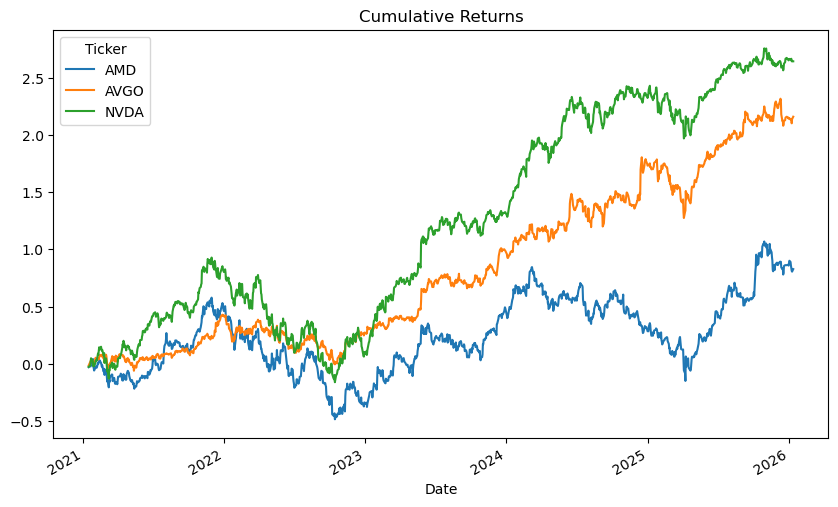

In [16]:
cumulative_log_returns = log_returns.cumsum()
cumulative_log_returns.plot(title="Cumulative Returns", figsize=(10, 6))